In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Read data

In [3]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

## Hyperparameter

In [4]:
input_size = 784 ## 28*28
hidden_size = 100
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.01

In [5]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
examples = iter(train_dataloader)
samples, labels = examples.next()

In [7]:
## batch_size = 100
## number_of_channel = 1
## image size = 28*28
print(f"Samples : {samples.shape}, Labels : {labels.shape}")

Samples : torch.Size([100, 1, 28, 28]), Labels : torch.Size([100])


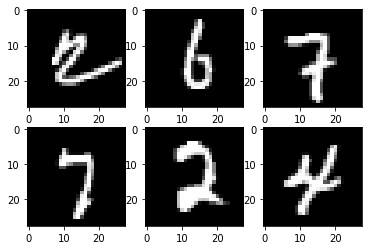

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [9]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
model = NeuralNet(input_size, hidden_size, num_classes)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criteria = nn.CrossEntropyLoss()

In [11]:
def evaluate(model):
    model.eval()
    
    n_corrected = 0
    n_samples = 0
    
    for images, labels in test_dataloader:
        
        images = images.view(-1, 784).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predictions = torch.max(outputs,axis=1)
        
        n_corrected += (predictions==labels).sum().item()
        n_samples += len(labels)
    
    return n_corrected/n_samples

In [12]:
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_dataloader):
        
        ## images : 100*1*28*28
        images = images.view(-1, 784)
        y_pred = model(images)
        ##loss
        loss = criteria(y_pred, labels)
        ## backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 ==0:
            val_accuracy = evaluate(model)
            print(f"Epoch : {epoch+1}/{num_epochs},  Step : {i+1}/{len(train_dataloader)}, Train Loss : {loss.item():.4f}, Val Accuracy : {val_accuracy:.4f}")

Epoch : 1/3,  Step : 100/600, Train Loss : 0.2336, Val Accuracy : 0.9299
Epoch : 1/3,  Step : 200/600, Train Loss : 0.1276, Val Accuracy : 0.9384
Epoch : 1/3,  Step : 300/600, Train Loss : 0.3365, Val Accuracy : 0.9491
Epoch : 1/3,  Step : 400/600, Train Loss : 0.0911, Val Accuracy : 0.9563
Epoch : 1/3,  Step : 500/600, Train Loss : 0.1766, Val Accuracy : 0.9542
Epoch : 1/3,  Step : 600/600, Train Loss : 0.1713, Val Accuracy : 0.9609
Epoch : 2/3,  Step : 100/600, Train Loss : 0.0752, Val Accuracy : 0.9614
Epoch : 2/3,  Step : 200/600, Train Loss : 0.1035, Val Accuracy : 0.9670
Epoch : 2/3,  Step : 300/600, Train Loss : 0.1133, Val Accuracy : 0.9659
Epoch : 2/3,  Step : 400/600, Train Loss : 0.2177, Val Accuracy : 0.9629
Epoch : 2/3,  Step : 500/600, Train Loss : 0.1392, Val Accuracy : 0.9633
Epoch : 2/3,  Step : 600/600, Train Loss : 0.1192, Val Accuracy : 0.9627
Epoch : 3/3,  Step : 100/600, Train Loss : 0.1269, Val Accuracy : 0.9650
Epoch : 3/3,  Step : 200/600, Train Loss : 0.0658, 